# pNML Syntetic Data

In [1]:
import ast
import os.path as osp
import sys

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

sys.path.insert(0, "../src/")
from post_simulation_utils import load_simulation_results


In [2]:
# Plot params
%run ./plot_params.ipynb

# Load simulation resutls

In [3]:
if True:  # Fourier
    base_dirs = [
        osp.join("..", "output", "pnml_fourier_10_20201127_101120"),
        osp.join("..", "output", "pnml_fourier_20_20201127_101131"),
        osp.join("..", "output", "pnml_fourier_50_20201127_101134"),
    ]

else:  # Polynomial
    base_dirs = [
        osp.join("..", "output", "pnml_polynomial_4_20201126_151138"),
        osp.join("..", "output", "pnml_polynomial_6_20201126_151146"),
        osp.join("..", "output", "pnml_polynomial_7_20201126_151157"),
    ]

num_features_list, df = load_simulation_results(base_dirs)
print(num_features_list)


[10 20 50]


num_features=10 theta norm=295552.28127480054
num_features=20 theta norm=0.1513885445549927
num_features=50 theta norm=0.04269760597890522


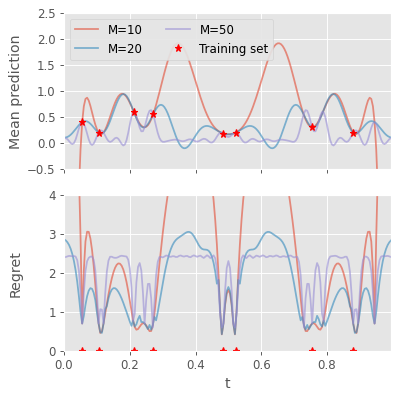

In [4]:
w, h = plt.rcParams.get("figure.figsize")
fig, axs = plt.subplots(2, 1, figsize=(0.8 * w, 1.2 * h), sharex=True)
ax = axs[0]
for i, num_features in enumerate(num_features_list):
    df_i = df[df.num_features == num_features]
    x_test, y_hat_erm = df_i["x_test"], df_i["y_hat_erm"]
    x_train = ast.literal_eval(df_i.iloc[0]["x_train"])
    y_train = ast.literal_eval(df_i.iloc[0]["y_train"])
    regret = df_i["regret"]

    ax = axs[0]
    ax.plot(x_test, y_hat_erm, label=f"M={num_features}", color=f"C{i}", alpha=0.6)
    ax.set_ylim(bottom=-0.5, top=2.5)

    ax = axs[1]
    ax.plot(x_test, regret, color=f"C{i}", alpha=0.6)
    ax.set_ylim(top=4)

    print("num_features={} theta norm={}".format(num_features, df_i["theta_erm_norm"].mean()))
ax = axs[0]
ax.plot(x_train, y_train, "r*", label="Training set")
ax.set_ylabel("Mean prediction")
ax.legend(loc=2, ncol=2)
ax.set_xlim(x_test.min(), x_test.max())

ax = axs[1]
ax.plot(x_train, [0] * len(y_train), "r*")
ax.set_ylim(bottom=0.0)
ax.set_ylabel("Regret")
ax.set_xlabel("t")
plt.tight_layout()

plt.tight_layout()
fig.align_ylabels(axs)
plt.savefig("../output/figures/pnml_min_norm_pred_and_regret.pdf")
plt.show()

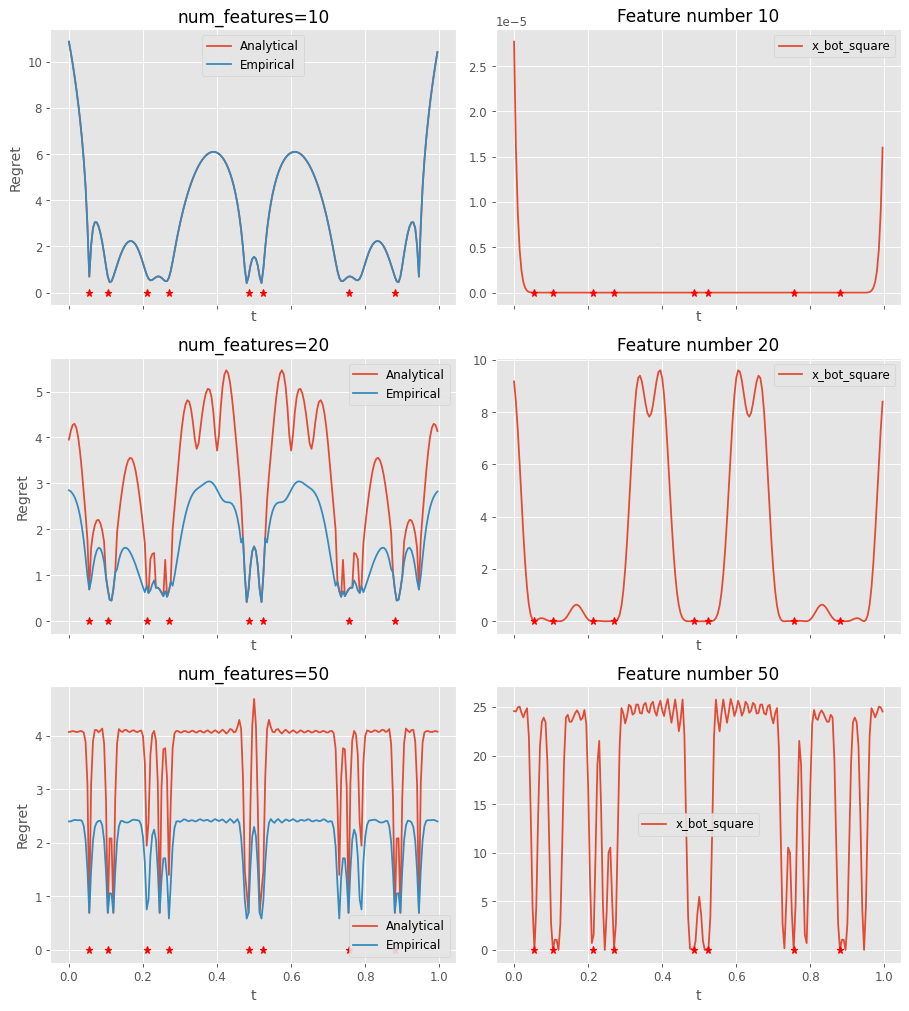

In [5]:
w, h = plt.rcParams.get("figure.figsize")
fig, axs = plt.subplots(
    len(num_features_list), 2, figsize=(1.8 * w, 3 * h), sharex=True
)

if not isinstance(axs, np.ndarray):
    axs = np.ndarray([axs])
if len(axs.shape) == 1:
    axs = np.expand_dims(axs, 0)

for i, num_features in enumerate(num_features_list):
    df_i = df[df.num_features == num_features]
    x_test, y_hat_erm = df_i["x_test"], df_i["y_hat_erm"]
    x_train = ast.literal_eval(df_i.iloc[0]["x_train"])
    y_train = ast.literal_eval(df_i.iloc[0]["y_train"])
    empirical_regret = df_i["regret"]
    analytical_regret = df_i["analytical_regret"]

    ax = axs[i, 0]
    ax.plot(x_test, analytical_regret, label="Analytical")
    ax.plot(x_test, empirical_regret, label="Empirical")
    ax.plot(x_train, [0] * len(y_train), "r*")
    ax.set_title(f"num_features={num_features}")
    ax.set_ylabel("Regret")
    ax.set_xlabel("t")
    ax.legend()

    ax = axs[i, 1]
    for key in ["x_bot_square"]:#, "nf1", "nf2"]:
        ax.plot(x_test, df_i[key], label=key)
    ax.plot(x_train, [0] * len(y_train), "r*")
    ax.set_title(f"Feature number {num_features}")
    ax.legend()
    ax.set_xlabel("t")


plt.tight_layout()
plt.show()

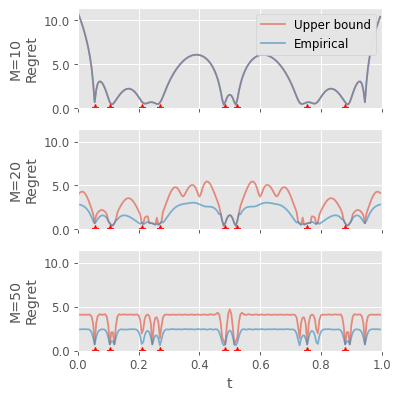

In [8]:
fig, axs = plt.subplots(
    len(num_features_list), 1, figsize=(0.8 * w, 1.2 * h), sharex=True, sharey=True
)


for i, num_features in enumerate(num_features_list):
    df_i = df[df.num_features == num_features]
    x_test, y_hat_erm = df_i["x_test"], df_i["y_hat_erm"]
    x_train = ast.literal_eval(df_i.iloc[0]["x_train"])
    y_train = ast.literal_eval(df_i.iloc[0]["y_train"])
    empirical_regret = df_i["regret"]
    analytical_regret = df_i["analytical_regret"]

    ax = axs[i]
    ax.plot(x_test, analytical_regret, color="C0", label="Upper bound", alpha=0.6)
    ax.plot(x_test, empirical_regret, color="C1", label="Empirical", alpha=0.6)
    ax.plot(x_train, [0] * len(y_train), "r*")
    #     ax.set_title(f"num_features={num_features}")
    ax.set_ylabel(f"M={num_features}\nRegret")
    ax.yaxis.set_major_formatter(FormatStrFormatter("%0.1f"))
    ax.set_ylim(bottom=0.0)
    ax.set_xlim(0.0,1.0)

axs[0].legend(loc=1, framealpha=0.99)
axs[-1].set_xlabel("t")

plt.tight_layout()
fig.align_ylabels(axs)
plt.savefig("../output/figures/syntetic_data_empirical_vs_analytical.pdf")
plt.show()